In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path=r'C:\Users\User\Documents\My Space\Attach'

In [6]:
image=cv2.imread(path+r"\faces.jpg")

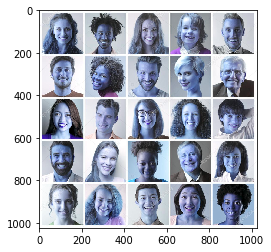

In [7]:
plt.imshow(image)

In [8]:
image.shape

(1024L, 1024L, 3L)

In [9]:
ht,wt=image.shape[:2]

In [10]:
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

h,s,v=cv2.split(hsv)

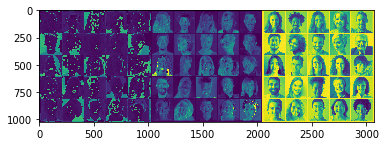

In [11]:
hsv_split=np.concatenate((h,s,v),axis=1)
plt.imshow(hsv_split)

In [12]:
cv2.imwrite(path+"/face_hsv.png",hsv_split)

True

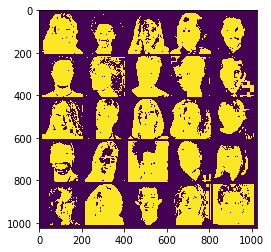

In [13]:
ret, min_sat= cv2.threshold(s,40,255,cv2.THRESH_BINARY)
plt.imshow(min_sat)

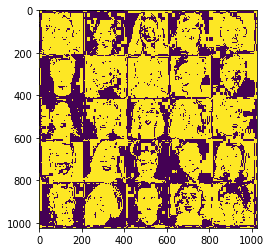

In [14]:
ret, max_hue= cv2.threshold(h,15,255,cv2.THRESH_BINARY_INV)
plt.imshow(max_hue)

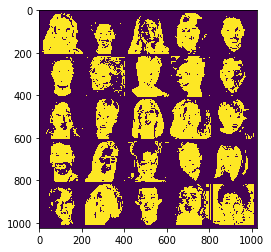

In [15]:
final=cv2.bitwise_and(min_sat,max_hue)
plt.imshow(final)

In [16]:
min_sat.shape,max_hue.shape,final.shape

((1024L, 1024L), (1024L, 1024L), (1024L, 1024L))

In [17]:
cv2.imwrite(path+"\minS_maxH_comb.jpeg",np.concatenate((min_sat,max_hue,final),axis=1))

True

## Contours

In [18]:
img =cv2.imread(path+"\detect_blob.png",1)

In [19]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [26]:
cv2.namedWindow("edges3", cv2.WINDOW_NORMAL)
cv2.imshow('edges3',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
thresh =cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
#plt.imshow(thresh)

In [14]:
cv2.imwrite(path+"\contor_blob_thresh.jpg",img)

True

In [15]:
_,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


In [16]:
img2=img.copy()

In [17]:
index= -1
thickness= 4
color= (255,0,255)
cv2.drawContours(img2,contours,index,color,thickness)

array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]]

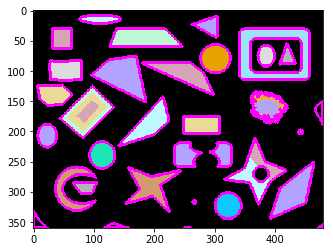

In [18]:
plt.imshow(img2)

In [19]:
objects=np.zeros([img.shape[0],img.shape[0],3],'uint8')

In [20]:
for c in contours:
    cv2.drawContours(objects,[c],-1,color,-1)
    area= cv2.contourArea(c)
    perimeter= cv2.arcLength(c,True)
    
    M=cv2.moments(c)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
    print("Area- ",area,"  Perimeter- ",perimeter)

Area-  8.0   Perimeter-  22.82842707633972
Area-  20.0   Perimeter-  22.485281229019165
Area-  149.0   Perimeter-  85.79898941516876
Area-  277.0   Perimeter-  91.11269795894623
Area-  24.0   Perimeter-  18.485281229019165
Area-  1458.5   Perimeter-  143.2964632511139
Area-  532.5   Perimeter-  100.87005710601807
Area-  2392.5   Perimeter-  353.74725663661957
Area-  1709.0   Perimeter-  341.7056255340576
Area-  2896.5   Perimeter-  271.17871272563934
Area-  911.0   Perimeter-  140.42640602588654
Area-  1260.0   Perimeter-  160.08326017856598
Area-  1454.0   Perimeter-  143.8822489976883
Area-  3406.5   Perimeter-  350.29141068458557
Area-  472.0   Perimeter-  81.2548336982727
Area-  42.0   Perimeter-  25.313708305358887
Area-  932.0   Perimeter-  116.56854152679443
Area-  1711.0   Perimeter-  176.0
Area-  263.0   Perimeter-  89.11269748210907
Area-  2386.5   Perimeter-  255.9482650756836
Area-  2134.0   Perimeter-  291.98989486694336
Area-  2.0   Perimeter-  5.656854152679443
Area-  2.

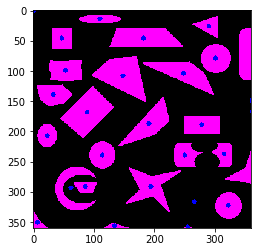

In [21]:
plt.imshow(objects)